In [7]:
import torch
import requests
from models.clipseg import CLIPDensePredT
from PIL import Image
from torchvision import transforms
from matplotlib import pyplot as plt

# load model
model = CLIPDensePredT(version='ViT-B/16', reduce_dim=64)
model.eval();

# non-strict, because we only stored decoder weights (not CLIP weights)
model.load_state_dict(torch.load('weights/rd64-uni.pth', map_location=torch.device('cpu')), strict=False);

Load and normalize `example_image.jpg`. You can also load through an URL.

In [8]:
# load and normalize image
input_image = Image.open('example_image.jpg')

# or load from URL...
# image_url = 'https://farm5.staticflickr.com/4141/4856248695_03475782dc_z.jpg'
# input_image = Image.open(requests.get(image_url, stream=True).raw)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.Resize((352, 352)),
])
img = transform(input_image).unsqueeze(0)

Predict and visualize (this might take a few seconds if running without GPU support)

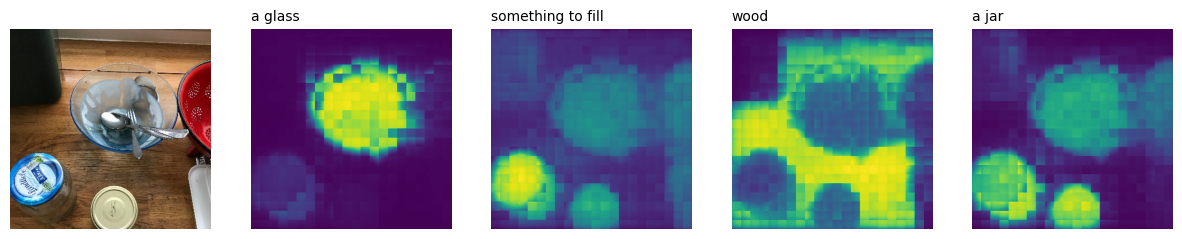

In [9]:
prompts = ['a glass', 'something to fill', 'wood', 'a jar']

# predict
with torch.no_grad():
    preds = model(img.repeat(4,1,1,1), prompts)[0]

# visualize prediction
_, ax = plt.subplots(1, 5, figsize=(15, 4))
[a.axis('off') for a in ax.flatten()]
ax[0].imshow(input_image)
[ax[i+1].imshow(torch.sigmoid(preds[i][0])) for i in range(4)];
[ax[i+1].text(0, -15, prompts[i]) for i in range(4)];